In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\Vigan\Downloads\final_data.csv")

In [4]:
data.head()

,first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,Julius,Erving,PHI,1980,82.0,35:02:00,9.68,18.59,0.05,0.22,...,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
1,Eddie,Johnson,ATL,1980,75.0,35:55:00,7.64,15.16,0.08,0.32,...,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
2,Artis,Gilmore,CHI,1980,81.0,34:31:00,6.67,9.93,0.00,0.00,...,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
3,Reggie,Theus,CHI,1980,81.0,34:20:00,6.58,13.38,0.22,1.09,...,3.56,5.41,1.73,0.28,3.65,3.14,18.84,0.492,0.203,0.808
4,Larry,Bird,BOS,1980,82.0,39:30:00,8.77,18.33,0.24,0.92,...,10.91,5.50,2.61,0.84,3.69,2.91,21.23,0.478,0.266,0.863


In [7]:
data.isnull().sum()

first           0
last            0
team            0
year            0
games_played    1
min             1
fgm             1
fga             1
fg3m            1
fg3a            1
ftm             1
fta             1
oreb            1
dreb            1
reb             1
ast             1
stl             1
blk             1
turnover        1
pf              1
pts             1
fg_pct          1
fg3_pct         1
ft_pct          1
dtype: int64

In [8]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [12]:
data = data.drop('oreb', axis=1)


In [13]:
data = data.drop('dreb', axis=1)

In [15]:
null_values = data.isnull().sum()
print(null_values)

first           0
last            0
team            0
year            0
games_played    1
min             1
fgm             1
fga             1
fg3m            1
fg3a            1
ftm             1
fta             1
reb             1
ast             1
stl             1
blk             1
turnover        1
pf              1
pts             1
fg_pct          1
fg3_pct         1
ft_pct          1
dtype: int64


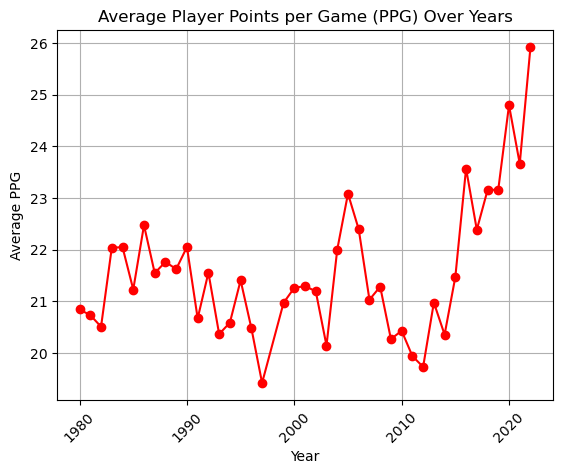

In [21]:
plt.plot(data.groupby('year')['pts'].mean(), marker='o', color='red')
plt.title('Average Player Points per Game (PPG) Over Years')
plt.xlabel('Year')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\Vigan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


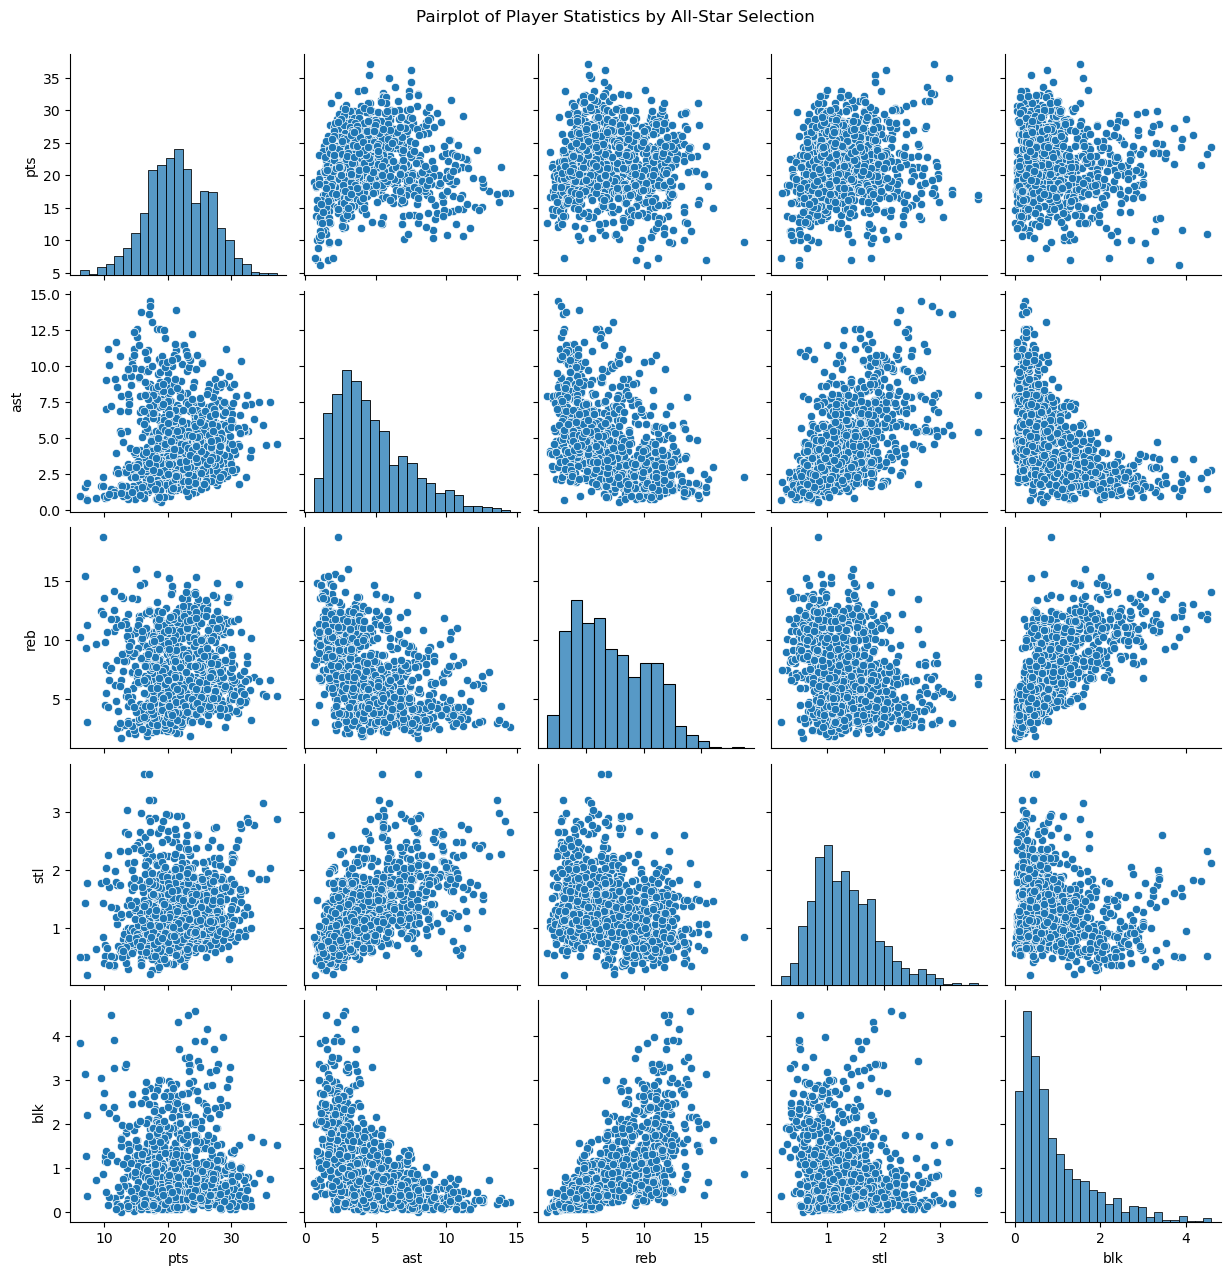

In [48]:
sns.pairplot(data, vars=['pts', 'ast', 'reb', 'stl', 'blk'])
plt.suptitle('Pairplot of Player Statistics by All-Star Selection', y=1.02)
plt.show()

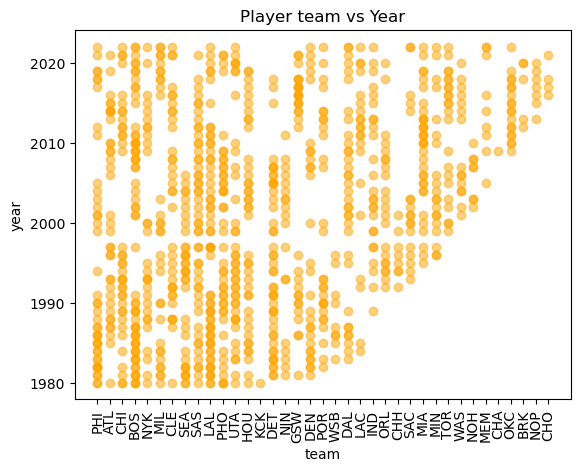

In [44]:
plt.scatter(data['team'], data['year'], color='orange', alpha=0.5)
plt.xticks(rotation=90)  

plt.title('Player team vs Year')
plt.xlabel('team')
plt.ylabel('year')
plt.show()

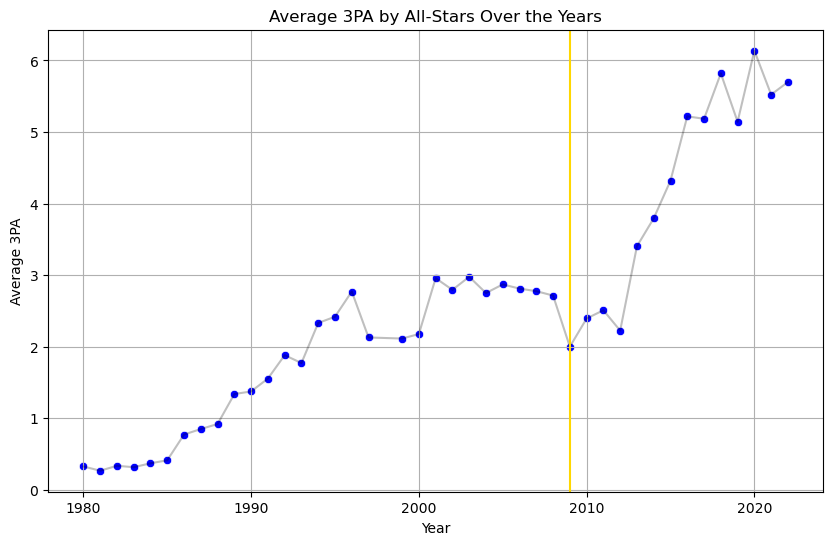

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the all stars by year and find average number of 3 pointers attempted by all stars
avg_3_atempt = data.groupby('year')['fg3a'].mean().reset_index()

# Plot the average number of three pointers attempted by all stars over the years of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_3_atempt, x='year', y='fg3a', color='blue')
sns.lineplot(data=avg_3_atempt, x='year', y='fg3a', color='black', alpha=0.25)
plt.axvline(x=2009, color='gold') # Add the vertical line at 2009 for Curry
plt.xlabel('Year')
plt.ylabel('Average 3PA')
plt.title('Average 3PA by All-Stars Over the Years')
plt.grid(True)
plt.show()

In [111]:
import pandas as pd
threshold = data['games_played'].median()

# Convert to binary based on the threshold
data['games_played_binary'] = data['games_played'].apply(lambda x: 1 if x > threshold else 0)

# Display the modified DataFrame
print(data)

         first  last  team  year  games_played       min   fgm    fga  fg3m  \
0       Julius    65    27  1980          82.0  35:02:00  9.68  18.59  0.05   
1        Eddie   109     0  1980          75.0  35:55:00  7.64  15.16  0.08   
2        Artis    78     5  1980          81.0  34:31:00  6.67   9.93  0.00   
3       Reggie   210     5  1980          81.0  34:20:00  6.58  13.38  0.22   
4        Larry    21     1  1980          82.0  39:30:00  8.77  18.33  0.24   
...        ...   ...   ...   ...           ...       ...   ...    ...   ...   
998       Paul    75    15  2022          56.0  34:39:00  8.20  17.93  2.82   
999    Anthony    60    20  2022          81.0  36:10:00  8.86  19.47  2.67   
1000    Tyrese    86    13  2022          56.0  33:32:00  7.36  15.02  2.88   
1001  De'Aaron    69    30  2022          73.0  33:23:00  9.34  18.23  1.63   
1002     Jaren   106    17  2022          63.0  28:24:00  6.60  13.05  1.59   

      fg3a  ...   stl   blk  turnover    pf    pts 

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = data.dropna()  # Drop rows with missing values

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Drop the target variable from the features
X = data_encoded.drop('games_played', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.17412935323383086

Classification Report:
              precision    recall  f1-score   support

        19.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         3
        55.0       0.00      0.00      0.00         0
        56.0       0.00      0.00      0.00         3
        57.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         0
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         3
        62.0       0.00      0.00      0.00         2
        64.0       0.00    

C:\Users\Vigan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vigan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vigan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe